In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [71]:
values = pd.read_csv('/content/drive/MyDrive/train_values.csv')

labelsdf = pd.read_csv('/content/drive/MyDrive/train_labels.csv')

In [4]:
columns = ['land_surface_condition', 'foundation_type', 'roof_type', \
           'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status']

In [5]:
for column in columns:
  values[column] = values[column].astype('category')

<BarContainer object of 3 artists>

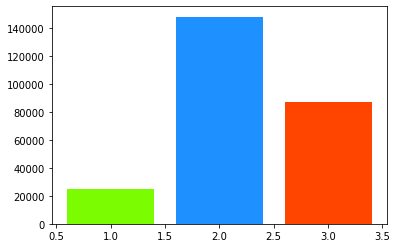

In [ ]:
data_frame = labels.groupby('damage_grade').count().rename(columns = {'building_id' : 'cantidad_hogares'}).reset_index()
plt.bar(data_frame['damage_grade'], data_frame['cantidad_hogares'], color = ['lawngreen', 'dodgerblue', 'orangered'])

**Región general con más viviendas**

In [ ]:
geo1_damage.groupby('geo_level_1_id').agg({'building_id' : 'count'}).rename(columns = {'building_id' : 'cantidad_hogares'})\
      .nlargest(5, 'cantidad_hogares')

,cantidad_hogares
geo_level_1_id,
6,24381
26,22615
10,22079
17,21813
8,19080


In [ ]:
geo1 = values.loc[:, ['building_id', 'geo_level_1_id']]
geo1_damage = geo1.merge(labels)

df = geo1_damage.groupby(['geo_level_1_id', 'damage_grade']).agg({'building_id' : 'count'}).rename(columns = {'building_id' : 'cantidad_hogares'})
df.iloc[[18,19,20], :]

cantidad_hogares
geo_level_1_id damage_grade                  
6              1                         2108
               2                        16222
               3                         6051

De las 31 regiones generales según el geo_level_1_id, la que más viviendas posee es la región número 6 con 24381 viviendas. En dicha región, el 66.5 % de éstas sufrieron daños de nivel 2.

**Regiones generales con mayor cantidad de viviendas que sufrieron daños serios**

Text(0, 0.5, 'cantidad de hogares')

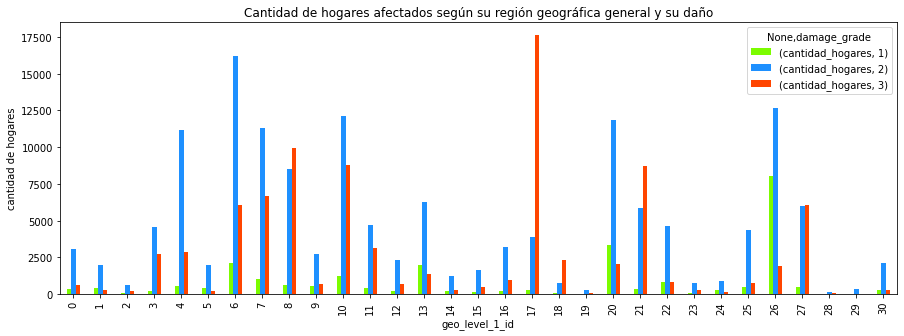

In [ ]:
df.unstack().plot(kind = 'bar', figsize = (15,5), color = ['lawngreen', 'dodgerblue', 'orangered'], \
                   title = 'Cantidad de hogares afectados según su región geográfica general y su daño')
plt.ylabel('cantidad de hogares')

In [ ]:
df_short = df3.iloc[[24,25,26,51,52,53,54,55,56,63,64,65,81,82,83], :]
df_short

cantidad_hogares
geo_level_1_id damage_grade                  
8              1                          654
               2                         8513
               3                         9913
17             1                          285
               2                         3913
               3                        17615
18             1                           72
               2                          786
               3                         2331
21             1                          322
               2                         5857
               3                         8710
27             1                          465
               2                         6007
               3                         6060

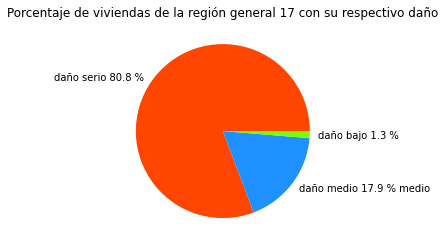

In [ ]:
array = [(17615*100)/21813, (3913*100)/21813, (285*100)/21813]
names = ['daño serio 80.8 %', 'daño medio 17.9 % medio', 'daño bajo 1.3 %']
plt.pie(array, labels = names, colors = ['orangered', 'dodgerblue', 'lawngreen'])
plt.title('Porcentaje de viviendas de la región general 17 con su respectivo daño')
plt.show()

En las regiones generales 8, 17, 18, 21 y 27 la mayoría de las viviendas sufrieron daños serios. La región 17 fue la más afectada por el terremoto con más del 80% de sus propiedades recibiendo daños de nivel 3.

**Analizando las subregiones correspondientes a la región principal 17**

In [ ]:
geo2_17 = values.loc[values['geo_level_1_id'] == 17, ['building_id', 'geo_level_2_id']]

In [ ]:
geo2_17_damage = geo2_17.merge(labels)

In [ ]:
geo2_17_damage.groupby('geo_level_2_id').agg({'building_id' : 'count'}).rename(columns = {'building_id' : 'cantidad_hogares'})\
      .nlargest(10, 'cantidad_hogares')

,cantidad_hogares
geo_level_2_id,
1080,725
421,601
566,522
1149,499
233,490
399,422
1308,404
930,390
303,388


In [ ]:
geo2_17_damage.loc[(geo2_17_damage['geo_level_2_id'] == 1080) | (geo2_17_damage['geo_level_2_id'] == 1149), :]\
      .groupby(['geo_level_2_id', 'damage_grade']).agg({'building_id' : 'count'}).rename(columns = {'building_id' : 'cantidad_hogares'})

cantidad_hogares
geo_level_2_id damage_grade                  
1080           1                            8
               2                          185
               3                          532
1149           1                            1
               2                           21
               3                          477

Dentro de la región general con geo_level_1_id 17 se encuentran 79 subregiones identificadas por el geo_level_2_id. Entre éstas, la identificada por el número 1080 es la que más viviendas posee con 725. El 73.4 % de sus viviendas sufrieron daños de nivel 3. Por otro lado, el 95.6 % de los hogares pertenecientes a la subregión 1149 sufrieron daños serios. 

Text(0, 0.5, 'cantidad de hogares')

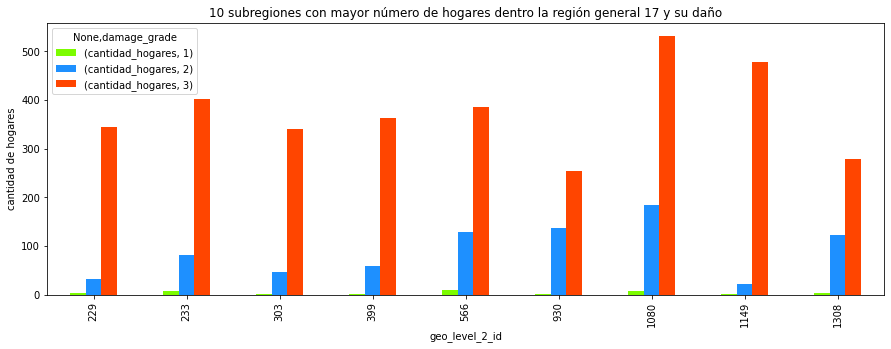

In [ ]:
df2 = geo2_17_damage.loc[(geo2_17_damage['geo_level_2_id'] == 1080) | (geo2_17_damage['geo_level_2_id'] == 566) \
                   | (geo2_17_damage['geo_level_2_id'] == 1149) | (geo2_17_damage['geo_level_2_id'] == 233) | (geo2_17_damage['geo_level_2_id'] == 399) \
                   | (geo2_17_damage['geo_level_2_id'] == 1308) | (geo2_17_damage['geo_level_2_id'] == 930) | (geo2_17_damage['geo_level_2_id'] == 303) \
                   | (geo2_17_damage['geo_level_2_id'] == 229), :]

df2.groupby(['geo_level_2_id', 'damage_grade']).agg({'building_id' : 'count'}).rename(columns = {'building_id' : 'cantidad_hogares'})\
      .unstack().plot(kind = 'bar', figsize = (15,5), color = ['lawngreen', 'dodgerblue', 'orangered'], \
                   title = '10 subregiones con mayor número de hogares dentro la región general 17 y su daño')
plt.ylabel('cantidad de hogares')

Ya que más del 80 % de las viviendas en la región geográfica con geo_level_1_id 17 sufrieron daños serios, no es inesperado que en sus 10 subregiones (geo_level_2_id) con mayor número de hogares, la mayoría de estos recibieran daños de nivel 3.

**Análisis de la Cantidad de familias que habitaban las viviendas**

Cantidad de familias que habitaban las viviendas

In [66]:
familias = values.loc[:, ['building_id', 'count_families']].rename(columns = {'count_families' : 'cantidad_familias'})
familias_cantidad = familias.groupby('cantidad_familias').count()\
      .rename(columns = {'building_id' : 'cantidad_viviendas'})

familias_cantidad

,cantidad_viviendas
cantidad_familias,
0,20862
1,226115
2,11294
3,1802
4,389
5,104
6,22
7,7
8,2


**Plot**

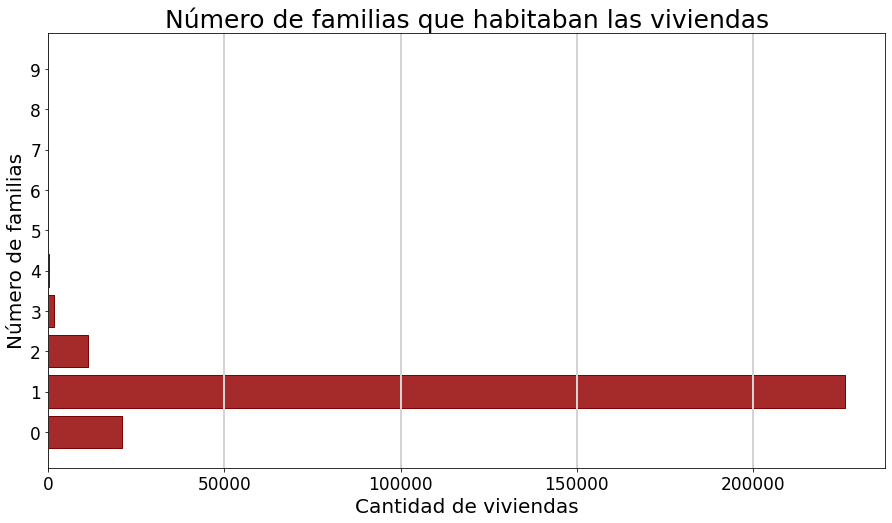

In [35]:
fig, ax = plt.subplots(figsize = (15,8))

x = np.arange(len(familias_cantidad))
width = 0.8

plot = ax.barh(x, familias_cantidad['cantidad_viviendas'], width, color = 'brown', edgecolor = 'maroon')

ax.set_title('Número de familias que habitaban las viviendas', fontsize = 25)
ax.set_xlabel('Cantidad de viviendas', fontsize = 20)
ax.set_ylabel('Número de familias', fontsize = 20)
ax.set_yticks(x)
ax.set_yticklabels(familias_cantidad.index)

plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)

plt.grid(axis = 'x', linewidth = 2, color = 'lightgray')

'''plt.bar_label(plot, labels = familias_cantidad['cantidad_viviendas'], padding = 1, \
             label_type = 'edge', color = 'black', fontsize = 14, \
             fontweight = 'bold', rotation = 0, alpha = 0.7)'''

plt.show()

In [59]:
# viviendas con dos o más familias viviendo allí
familias2Mas = familias.loc[familias['cantidad_familias'] > 1, :]
familias2Mas['cantidad_familias'] = '2 o mas'
familias2Mas.groupby('cantidad_familias').count().rename(columns = {'building_id' : 'viviendas'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,viviendas
cantidad_familias,
2 o mas,13624


In [60]:
# viviendas con 0 o 1 familia viviendo allí
familias01 = familias.loc[familias['cantidad_familias'] <= 1, :]
familias01.groupby('cantidad_familias').count().rename(columns = {'building_id' : 'viviendas'})

,viviendas
cantidad_familias,
0,20862
1,226115


En el 86.8 % de las viviendas vivía una sola familia. El 8.0 % de las viviendas estaba habitada por gente viviendo sola, y el 5.2 % tenían que ser compartidas por dos o más familias.

**Relación entre el número de familias que habitaban una vivienda y el daño que sufrió ésta**

In [73]:
familias_damage = familias.merge(labelsdf)

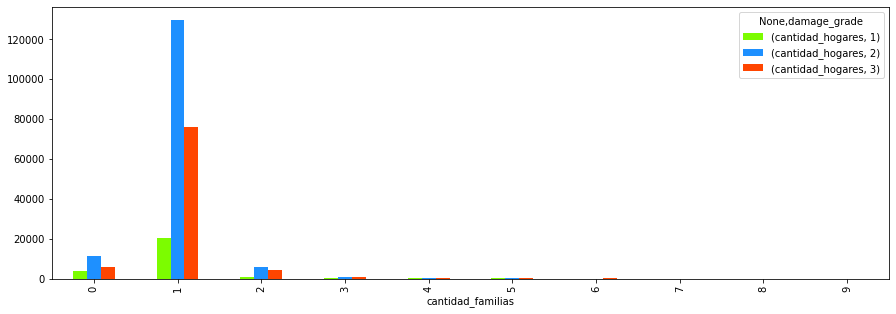

In [74]:
familias_damage.groupby(['cantidad_familias', 'damage_grade']).agg({'building_id' : 'count'}).rename(columns = {'building_id' : 'cantidad_hogares'})\
      .unstack().plot(kind = 'bar', color = ['lawngreen', 'dodgerblue', 'orangered'], figsize = (15,5))